# 🍕 Food Recognition Benchmark

# Data Exploration 🧐

In this section we are going to read our dataset & doing some data visualisations 

In [118]:
from pycocotools.coco import COCO
import plotly.graph_objects as go
from collections import OrderedDict
import json
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np
import cv2
from skimage.draw import polygon
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split

## Reading Data

In [2]:
# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "D:\\data\\food_detection\\public_train\\annotations.json"
TRAIN_IMAGE_DIRECTIORY = "D:\\data\\food_detection\\public_train\\images"

VAL_ANNOTATIONS_PATH = "D:\\data\\food_detection\\public_validation\\annotations.json"
VAL_IMAGE_DIRECTIORY = "D:\\data\\food_detection\\public_validation\\images"

In [3]:
train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

loading annotations into memory...
Done (t=8.37s)
creating index...
index created!


In [4]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
    train_annotations_data = json.load(f)
    
with open(VAL_ANNOTATIONS_PATH) as f:
    val_annotations_data = json.load(f)

In [86]:
train_annotations_data.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [95]:
df_annos = pd.DataFrame(train_annotations_data['annotations'])

In [97]:
df_annos.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,184135,131094,1352,"[[115.0, 206.5, 98.0, 204.5, 74.5, 182.0, 65.0...",5059.0,"[39.5, 39.5, 167.0, 92.0]",0
1,184136,131094,1893,"[[182.2599609375, 210.67999877929685, 58.65996...",18642.0,"[8.2599609375, 8.2599609375, 366.8200378417969...",0
2,184138,131094,1310,"[[147.4599609375, 161.47999877929686, 165.4599...",12278.0,"[23.479998779296878, 86.25996093750001, 217.57...",0
3,184139,131094,1565,"[[401.8599609375, 239.4799987792969, 350.25996...",35610.0,"[239.4799987792969, 243.4599609375, 215.999999...",0
4,184988,131094,1264,"[[263.8599609375, 127.87999877929687, 290.2599...",6071.0,"[127.87999877929687, 263.8599609375, 242.77996...",0


In [90]:
df_images = pd.DataFrame(train_annotations_data['images'])

In [91]:
df_images.head()

,id,file_name,width,height
0,131094,131094.jpg,480,480
1,131097,131097.jpg,391,390
2,131098,131098.jpg,391,390
3,131100,131100.jpg,391,390
4,131101,131101.jpg,391,390


In [101]:
df_images['segmentation'] = [0]*len(df_images)
for i in tqdm(range(len(df_images))):
    img_id = df_images['id'].iloc[i]
    df_anno = df_annos[df_annos['image_id'] == img_id]
    annos_seg = list(df_anno['segmentation'])
    sum_annos = []
    for anno in annos_seg:
        sum_annos += anno
    df_images['segmentation'].iloc[i] = sum_annos

  0%|                                                                    | 0/39962 [00:00<?, ?it/s]C:\Users\Admin\anaconda3\envs\det\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Admin\anaconda3\envs\det\lib\site-packages\pandas\core\dtypes\cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
C:\Users\Admin\anaconda3\envs\det\lib\site-packages\pandas\core\internals\blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested 

In [102]:
df_images.head()

,id,file_name,width,height,segmentation
0,131094,131094.jpg,480,480,"[[115.0, 206.5, 98.0, 204.5, 74.5, 182.0, 65.0..."
1,131097,131097.jpg,391,390,"[[159.82125, 345.04625, 143.20375, 355.79875, ..."
2,131098,131098.jpg,391,390,"[[229.22375000000002, 307.90124999999995, 189...."
3,131100,131100.jpg,391,390,"[[248.77375, 275.64374999999995, 244.863749999..."
4,131101,131101.jpg,391,390,"[[191.0, 317.5, 147.0, 313.5, 130.0, 306.5, 12..."


In [119]:
df_train, df_valid = train_test_split(df_images, test_size = 0.2, random_state = 42)

In [121]:
df_train['is_valid'] = False
df_valid['is_valid'] = True

In [123]:
df_dev = pd.concat([df_train, df_valid], axis = 0)
df_dev.to_csv('../resource/df_anno_seg.csv', header = True, index = False)

In [131]:
import torch
torch.save(df_dev, '../resource/df_anno_seg.pth')

In [124]:
img = cv2.imread(os.path.join(TRAIN_IMAGE_DIRECTIORY, df_images['file_name'].iloc[2]))
a_mask = np.zeros(shape=img.shape[0:2], dtype=int) # original
for seg in list(df_images['segmentation'].iloc[2]):
    # for seg in ann:
    poly = np.array(seg).reshape((int(len(seg)/2), 2))
    rr, cc = polygon(poly[:,0], poly[:,1], img.shape[0:2])
    a_mask[cc,rr] = 1


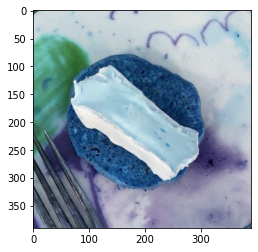

In [125]:
plt.imshow(img)

In [127]:
a_mask.shape

(390, 391)

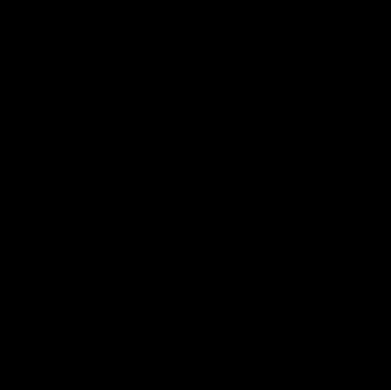

In [132]:
Image.fromarray(a_mask)

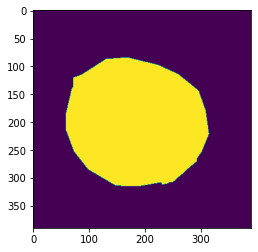

In [126]:
plt.imshow(a_mask)